<a href="https://colab.research.google.com/github/Junhojuno/keras-tutorial/blob/master/05_Convnet_with_small_data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 소규모 데이터셋으로 CNN학습하기
- 2,000장 강아지, 2,000장 고양이 사진 = 총 4,000장 데이터
- validation 1,000장, test 1,000장

##### 1. data augmentation 
    - 2,000장의 training set으로 기본 성능을 만든다. *이슈 포인트 :  overfitting
    - overfitting을 줄이기 위해 data augmentation 실시 <br>
    
##### 2. pre-training model 활용
    - pre-trained된 network로 특성 추출
    - pre-trained된 network를 fine-tuning

In [0]:
# 데이터 다운
# 25000 --> 4000 소규모 데이터 셋으로 만든다.
# train 데이터를 train, validation, test 셋으로 나누자

import shutil, os

original_dataset_dir = "./datasets/cats_and_dogs/train/"

base_dir = "./datasets/cats_and_dogs_small"
os.mkdir(base_dir)

# 경로 및 디렉토리 생성
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 강아지/고양이 데이터셋 디렉토리 생성
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 검증용 강아지/고양이 데이터셋 디렉토리 생성
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 테스트용 강아지/고양이 데이터셋 디렉토리 생성
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

In [0]:
# # colab용 path 재지정
# import shutil, os

# base_dir = "./"

# # 경로 및 디렉토리 생성
# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validation')
# test_dir = os.path.join(base_dir, 'test')

# # 훈련용 강아지/고양이 데이터셋 디렉토리 생성
# train_dogs_dir = os.path.join(train_dir, 'dogs')
# train_cats_dir = os.path.join(train_dir, 'cats')

# # 검증용 강아지/고양이 데이터셋 디렉토리 생성
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# validation_cats_dir = os.path.join(validation_dir, 'cats')

# # 테스트용 강아지/고양이 데이터셋 디렉토리 생성
# test_dogs_dir = os.path.join(test_dir, 'dogs')
# test_cats_dir = os.path.join(test_dir, 'cats')

In [0]:
# 이미지를 각 디렉토리에 집어넣자
# colab에서는 이미 나눈 데이터를 올려서 했기때문에 이건 돌릴필요없음.
# 알아서 연동되면 좋은데...ㅠ

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] # 처음 1000장 강아지 이미지를 train_dogs_dir로 복사
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    cp_src = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, cp_src)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)] # 다음 500장 강아지 이미지를 validation_dogs_dir로 복사
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    cp_src = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, cp_src)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)] # 다음 500장 강아지 이미지를 test_dogs_dir로 복사
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    cp_src = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, cp_src)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] # 처음 1000장 고양이 이미지를 train_cats_dir로 복사
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    cp_src = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, cp_src)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)] # 다음 500장 고양이 이미지를 validation_cats_dir로 복사
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    cp_src = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, cp_src)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)] # 다음 500장 고양이 이미지를 test_cats_dir로 복사
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    cp_src = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, cp_src)  

In [11]:
# 잘 들어갔는지 확인해보자
print("훈련용 강아지 이미지 총 갯수 : ", len(os.listdir(train_dogs_dir)))
print("훈련용 고양이 이미지 총 갯수 : ", len(os.listdir(train_cats_dir)))

print("검증용 강아지 이미지 총 갯수 : ", len(os.listdir(validation_dogs_dir)))
print("검증용 고양이 이미지 총 갯수 : ", len(os.listdir(validation_cats_dir)))

print("테스트용 강아지 이미지 총 갯수 : ", len(os.listdir(test_dogs_dir)))
print("테스트용 고양이 이미지 총 갯수 : ", len(os.listdir(test_cats_dir)))

훈련용 강아지 이미지 총 갯수 :  1000
훈련용 고양이 이미지 총 갯수 :  1000
검증용 강아지 이미지 총 갯수 :  500
검증용 고양이 이미지 총 갯수 :  500
테스트용 강아지 이미지 총 갯수 :  500
테스트용 고양이 이미지 총 갯수 :  500


In [0]:
# 네트워크 구성
from keras import models
from keras.layers import *

model = models.Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3))) # output shape은 148x148x32
model.add(MaxPooling2D(pool_size=(2,2))) # output shape은 74x74x32
model.add(Conv2D(64,kernel_size=(3,3), activation='relu')) # output shape은 72x72x64
model.add(MaxPooling2D(pool_size=(2,2))) # output shape은 36x36x64
model.add(Conv2D(128,kernel_size=(3,3), activation='relu')) # output shape은 34x34x128
model.add(MaxPooling2D(pool_size=(2,2))) # output shape은 17x17x128
model.add(Conv2D(128,kernel_size=(3,3), activation='relu')) # output shape은 15x15x128
model.add(MaxPooling2D(pool_size=(2,2))) # output shape은 7x7x128 , 7.5가 아니라 7이 되는구나...
model.add(Flatten()) # 7*7*128 = 6272개 유닛
model.add(Dense(units=512, activation='relu')) # output units = 512
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers

model.compile(optimizer=optimizers.rmsprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

In [0]:
# 데이터 전처리 with 제너레이터
# 0~255 --> 0~1 사잇값으로 조정
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
# 아래 flow_from_directory는 target directory안에 클래스별 디렉토리가 있어야한다.
# 이미지 크기는 150x150로 resize
# class mode에서 다중분류라면 'categorical'(2차원 one-hot encoding) 또는 'sparse'(1차원 정수 레이블)
train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(directory=validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
# 샘플 제너레이터 출력
# 무한정 배치를 만들어주기때문에 break를 걸어줘야한다.

for data_batch, labels_batch in train_generator:
    print("Batch data size : ", data_batch.shape)
    print("Batch labels size : ", labels_batch.shape)
    break

Batch data size :  (20, 150, 150, 3)
Batch labels size :  (20,)


In [0]:
# fit_generator사용해보자
hist = model.fit_generator(train_generator,
                           steps_per_epoch=100,
                           epochs=30,
                           validation_data=validation_generator,
                           validation_steps=50) # epoch당 50개의 validation batch뽑아서 평가하는듯

Epoch 1/30
100/100 [==============================] - 16s 159ms/step - loss: 0.6913 - acc: 0.5230 - val_loss: 0.6745 - val_acc: 0.5850
Epoch 2/30
100/100 [==============================] - 11s 111ms/step - loss: 0.6634 - acc: 0.5815 - val_loss: 0.6453 - val_acc: 0.6210
Epoch 3/30
100/100 [==============================] - 11s 107ms/step - loss: 0.6302 - acc: 0.6445 - val_loss: 0.6512 - val_acc: 0.6120
Epoch 4/30
100/100 [==============================] - 11s 106ms/step - loss: 0.5863 - acc: 0.6975 - val_loss: 0.5976 - val_acc: 0.6720
Epoch 5/30
100/100 [==============================] - 10s 104ms/step - loss: 0.5483 - acc: 0.7305 - val_loss: 0.6222 - val_acc: 0.6480
Epoch 6/30
100/100 [==============================] - 10s 103ms/step - loss: 0.5127 - acc: 0.7440 - val_loss: 0.5607 - val_acc: 0.7050
Epoch 7/30
100/100 [==============================] - 10s 103ms/step - loss: 0.4730 - acc: 0.7715 - val_loss: 0.5880 - val_acc: 0.6930
Epoch 8/30
100/100 [==============================] - 1

In [0]:
# 모델 저장(save)
model.save('dogs_and_cats_small_1.h5')

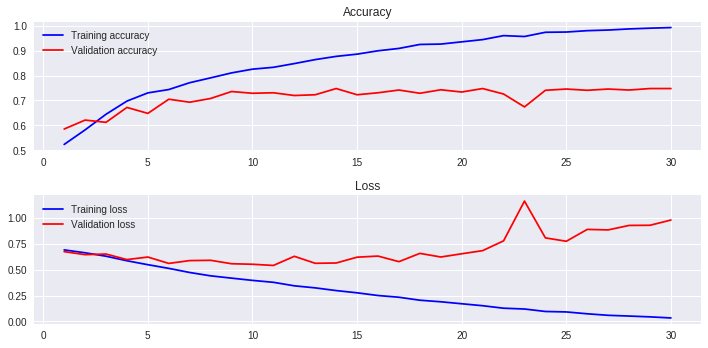

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.subplot(2,1,1)
plt.plot(range(1, len(hist.history['acc']) + 1), hist.history['acc'], 'b-', label='Training accuracy')
plt.plot(range(1, len(hist.history['acc']) + 1), hist.history['val_acc'], 'r-', label='Validation accuracy')
plt.title("Accuracy")
plt.legend()

plt.subplot(2,1,2)
plt.plot(range(1, len(hist.history['acc']) + 1), hist.history['loss'], 'b-', label='Training loss')
plt.plot(range(1, len(hist.history['acc']) + 1), hist.history['val_loss'], 'r-', label='Validation loss')
plt.title("Loss")
plt.legend()

plt.tight_layout()
plt.show()

---
### 데이터 증식 (data augmentation)
- ImageDataGenerator()

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
import shutil, os

base_dir = "./datasets/cats_and_dogs_small/"

# 경로 및 디렉토리 생성
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# 훈련용 강아지/고양이 데이터셋 디렉토리 생성
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cats_dir = os.path.join(train_dir, 'cats')

# 검증용 강아지/고양이 데이터셋 디렉토리 생성
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')

# 테스트용 강아지/고양이 데이터셋 디렉토리 생성
test_dogs_dir = os.path.join(test_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')

In [0]:
# ImageDataGenerator사용하여 데이터 증식 setting
datagen = ImageDataGenerator(rotation_range=20,# 랜덤하게 image를 회전시킬 각도
                             width_shift_range=0.1, # 수평 이동 비율
                             height_shift_range=0.1, # 수직 이동 비율
                             shear_range=0.1, # 전단 변환? 선형변환한다는 거 같음..자세히는..모름
                             zoom_range=0.1, # 확대 범위
                             horizontal_flip=True, # 수평 대칭 (좌우반전)
                             fill_mode='nearest') # 변환으로 생긴 빈공간 매꾸는 방식, nearest 인접한 픽셀

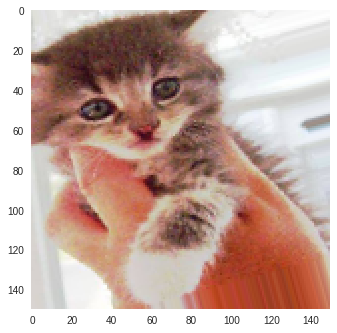

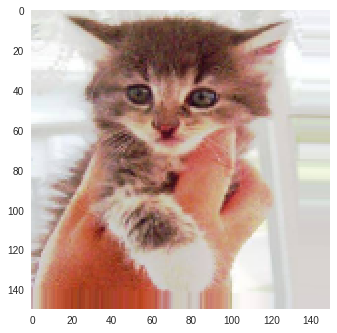

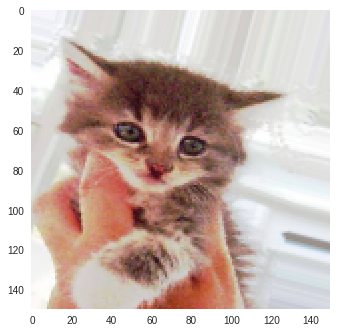

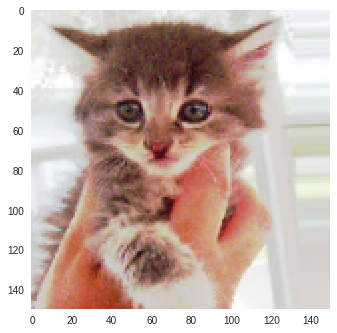

In [17]:
# random augmented된 training image 그리기
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# augmentation할 데이터 선택
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150)) # 불러올 image의 사이즈 조정

x = image.img_to_array(img=img) # (150,150,3) 배열로 변환
x = x.reshape((1,) + x.shape) # (1,150,150,3) 변환

i = 0
for batch in datagen.flow(x, batch_size=1): # 무한반복하여 x를 넣어 augmentation해준다.
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.grid(False)
    i += 1
    if i % 4 == 0:
        break
plt.show()

- 적은 수의 데이터를 가지고 재조합하여 만든것이기 때문에 입력데이터간에 상호연관성이 크다
- overfitting이 충분하게 제거되지 않을 수 있기때문에 fully connected layer직전에 dropout층을 추가한다.

In [0]:
from keras import models
from keras import optimizers
from keras.layers import *

model = models.Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3))) # output shape은 148x148x32
model.add(MaxPooling2D(pool_size=(2,2))) # output shape은 74x74x32
model.add(Conv2D(64,kernel_size=(3,3), activation='relu')) # output shape은 72x72x64
model.add(MaxPooling2D(pool_size=(2,2))) # output shape은 36x36x64
model.add(Conv2D(128,kernel_size=(3,3), activation='relu')) # output shape은 34x34x128
model.add(MaxPooling2D(pool_size=(2,2))) # output shape은 17x17x128
model.add(Conv2D(128,kernel_size=(3,3), activation='relu')) # output shape은 15x15x128
model.add(MaxPooling2D(pool_size=(2,2))) # output shape은 7x7x128 , 7.5가 아니라 7이 되는구나...
model.add(Flatten()) # 7*7*128 = 6272개 유닛
model.add(Dropout(rate=0.5))
model.add(Dense(units=512, activation='relu')) # output units = 512
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# test데이터는 augmentation하면 안됨!!!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=32,
                                                        class_mode='binary')

hist = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 37s 373ms/step - loss: 0.6946 - acc: 0.4991 - val_loss: 0.6907 - val_acc: 0.4994
Epoch 2/100
100/100 [==============================] - 32s 318ms/step - loss: 0.6823 - acc: 0.5597 - val_loss: 0.6780 - val_acc: 0.5451
Epoch 3/100
100/100 [==============================] - 32s 319ms/step - loss: 0.6696 - acc: 0.5900 - val_loss: 0.6527 - val_acc: 0.5971
Epoch 4/100
100/100 [==============================] - 32s 321ms/step - loss: 0.6485 - acc: 0.6113 - val_loss: 0.6235 - val_acc: 0.6334
Epoch 5/100
100/100 [==============================] - 32s 320ms/step - loss: 0.6314 - acc: 0.6437 - val_loss: 0.5983 - val_acc: 0.6783
Epoch 6/100
100/100 [==============================] - 32s 315ms/step - loss: 0.6098 - acc: 0.6591 - val_loss: 0.6383 - val_acc: 0.6385
Epoch 7/100
100/100 [==============================] - 32s 318ms/step - loss: 0.6096 - acc: 0.6644 -

In [0]:
model.save('cats_and_dogs_small_2.h5')

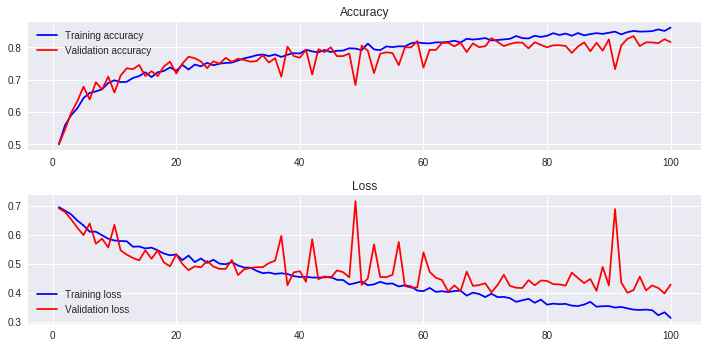

In [21]:
plt.figure(figsize=(10,5))

plt.subplot(2,1,1)
plt.plot(range(1, len(hist.history['acc']) + 1), hist.history['acc'], 'b-', label='Training accuracy')
plt.plot(range(1, len(hist.history['acc']) + 1), hist.history['val_acc'], 'r-', label='Validation accuracy')
plt.title("Accuracy")
plt.legend()

plt.subplot(2,1,2)
plt.plot(range(1, len(hist.history['acc']) + 1), hist.history['loss'], 'b-', label='Training loss')
plt.plot(range(1, len(hist.history['acc']) + 1), hist.history['val_loss'], 'r-', label='Validation loss')
plt.title("Loss")
plt.legend()

plt.tight_layout()
plt.show()

데이터가 적어 처음부터 훈련시켜 더 높은 정확도를 얻긴 힘들다.